1. a pairplot of the data (see Seaborn pairplot) and a comment on remarkable situations, if any (5pt)
2. a classification model using a method of your choice with the schema "train-validationtest" exploring an appropriate range of parameter values (5pt)
3. the optimal parameter(s) (5pt)
4. a scatter plot of the test set using a pair of attributes of your choice with the class as colour (5pt)
5. ... and the good/bad prediction as the point style (5pt)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
filename = './datasets/exam_2020_01_07_data.csv'
separator = ','
target = 'Class'
random_state = 42

%matplotlib inline
np.random.seed(random_state)

In [9]:
df = pd.read_csv(filename, sep=separator)
df.head()

,C00,C01,C02,C03,C04,Class
0,1.855416,0.466367,-0.176765,1.546514,0.149219,c
1,-0.107873,-0.136792,1.551591,-0.813810,1.357674,a
2,2.712560,-0.495846,1.397077,1.483562,1.656526,b
3,-2.166084,-0.582271,0.353011,-1.864210,-2.267033,b
4,2.848831,-0.507369,1.661752,1.466627,1.938519,b


# 1 
Pairplot of the data

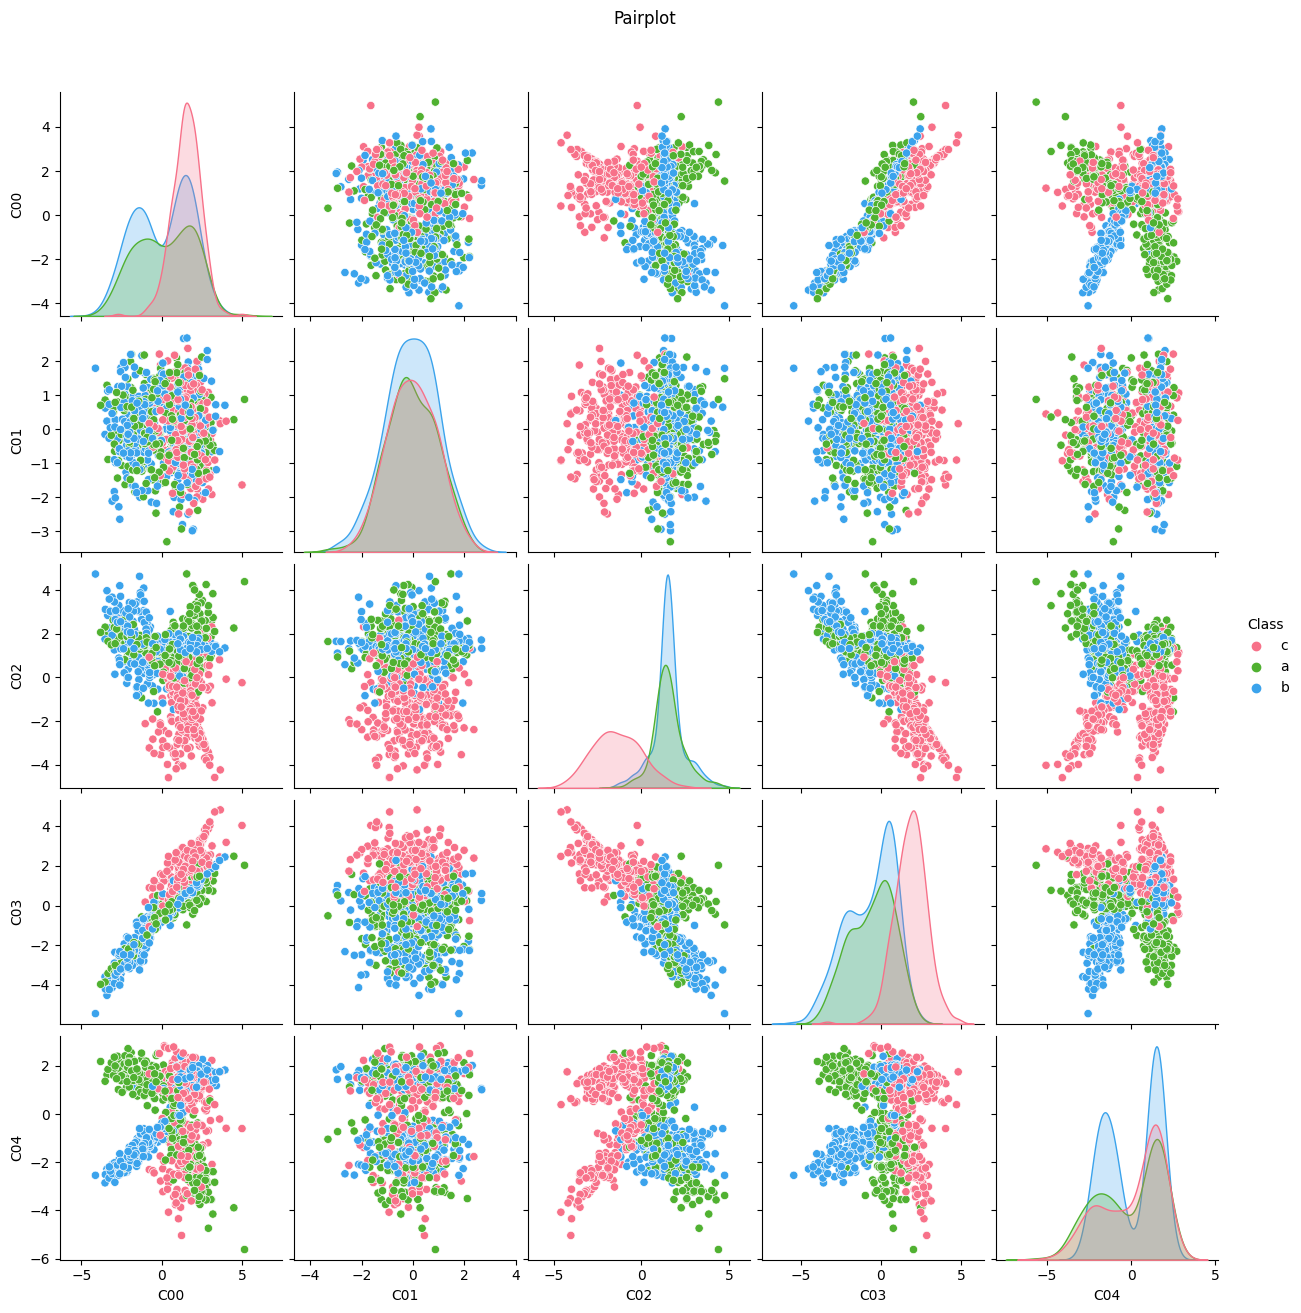

In [12]:
f = sns.pairplot(df, diag_kind='kde', hue=target, palette='husl')
f.fig.suptitle('Pairplot', y=1.05)
plt.show()

The pairplot does not show any remarkable situations.

# 2
Train-Validation-Test

In [13]:
X = df.drop(target, axis=1)
y = df[target]

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

print(f'Training with {len(X_train)} samples')
print(f'Testing with {len(X_test)} samples')

Training with 800 samples
Testing with 200 samples


In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [20]:
estimator = DecisionTreeClassifier(random_state=random_state)
estimator.fit(X_train, y_train)
train_pred = estimator.predict(X_train)
test_pred = estimator.predict(X_test)

In [23]:
print(f'Training accuracy: {accuracy_score(y_train, train_pred)*100:.2f}%')
print(f'Testing accuracy: {accuracy_score(y_test, test_pred)*100 :.2f}%')

Training accuracy: 100.00%
Testing accuracy: 90.50%


In [25]:
X_train_t, X_val, y_train_t, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=random_state)

print(f'Training with {len(X_train_t)} samples')
print(f'Validation with {len(X_val)} samples')

Training with 640 samples
Validation with 160 samples


In [32]:
max_depth = estimator.tree_.max_depth
print(f'Maximum depth: {max_depth}')

depths = range(1, max_depth+1)

Maximum depth: 12


In [33]:
scores = []
for depth in depths:
    estimator = DecisionTreeClassifier(max_depth=depth, random_state=random_state, criterion='entropy')
    estimator.fit(X_train_t, y_train_t)
    prediction = estimator.predict(X_val)
    score = accuracy_score(y_val, prediction)
    scores.append(score)

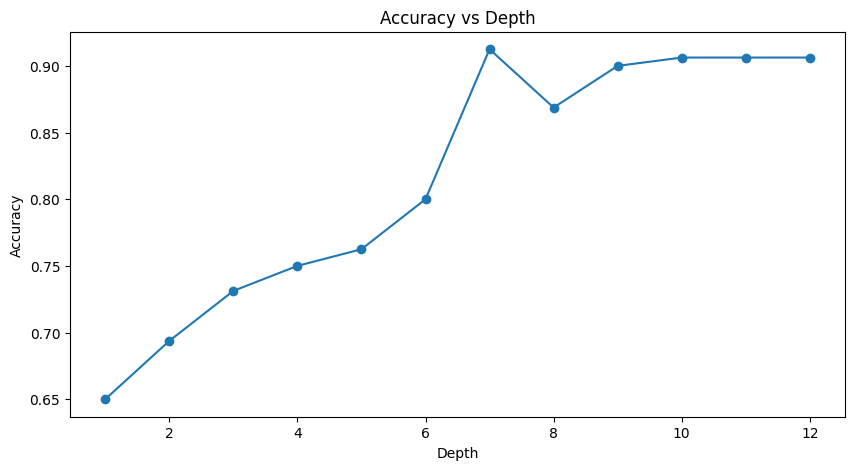

In [38]:
plt.figure(figsize=(10, 5))
plt.plot(depths, scores, marker='o')
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Depth')
plt.show()

# 3
Optimal parameters

In [40]:
best_depth = depths[np.argmax(scores)]
print(f'Best depth: {best_depth}')

Best depth: 7


In [41]:
estimator = DecisionTreeClassifier(max_depth=best_depth, random_state=random_state, criterion='entropy')
estimator.fit(X_train, y_train)
train_pred = estimator.predict(X_train)
test_pred = estimator.predict(X_test)


In [42]:
print(f'Accuracy on training set: {accuracy_score(y_train, train_pred)*100:.2f}%')
print(f'Accuracy on testing set: {accuracy_score(y_test, test_pred)*100:.2f}%')

Accuracy on training set: 86.88%
Accuracy on testing set: 78.00%


# 4 
Scatter plot of the test set

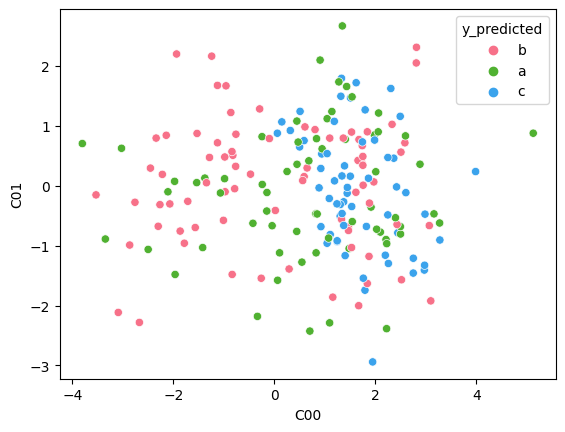

In [51]:
# We can use C00, C01 as features
df_test = X_test.assign(y_predicted = test_pred)

sns.scatterplot(x='C00', y='C01', hue='y_predicted', data=df_test, palette='husl');

# 5
Good/bad prediction

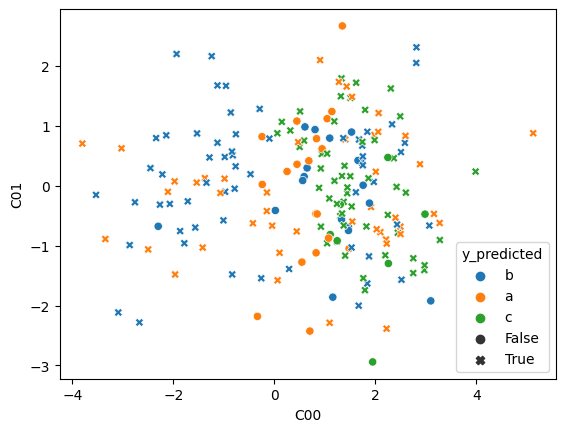

In [54]:
sns.scatterplot(x = 'C00', y = 'C01', data = df_test, hue = 'y_predicted', style = y_test == df_test['y_predicted']);